
# Traitements de base des images avec Jupyter Notebook
# Introduction
Notre monde d’aujourd’hui regorge de données et les images en constituent une partie importante. Cependant, pour pouvoir être utilisées, ces images doivent être traitées. Le traitement d’images consiste donc à analyser et à manipuler une image numérique principalement dans le but d’en améliorer la qualité ou d’en extraire des informations qui pourraient ensuite être utilisées.

Python devient un choix judicieux pour de telles tâches de traitement d’images. Cela est dû à sa popularité croissante en tant que langage de programmation scientifique et à la disponibilité gratuite de nombreux outils de traitement d’images de pointe dans son écosystème.

Dans ce TP, vous allez examiner quelques-unes des bibliothèques Python les plus couramment utilisées pour les tâches de manipulation d’images.
## I. Affichage d'images

Sous le paquet open source Python:``scikit-image``, une image I est représentée par une matrice ``numpy``. 

L'élément de base est appelée **pixel** qui représente simultanément un point de l'image et un élément de la matrice.


### I.1 Systèmes de coordonnées des images

|Type d'image |Coordonnées|
|:---|:---|
|Image 2D en niveaux de gris|(ligne, colonne)|
|Image 2D multibande|(ligne, colonne, bande)|
|Image 3D en niveaux de gris (ou volume) |(plan, ligne, colonne)|
|Image 3D multibande|(plan, ligne, colonne, bande)|

In [12]:
%matplotlib inline

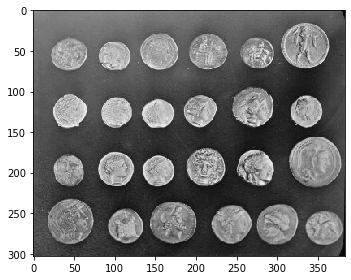

In [13]:
from skimage import data
from skimage import io
from matplotlib import pyplot as plt
image1 = data.coins()
io.imshow(image1) # afficher l'image coins 
plt.show()

### I.2. Types des données (images)

On trouve plusieurs conventions pour répresenter les valeurs des pixels d'une image:

```
  0 - 255   avec  0 est noir, 255 est blanc
  0 - 1     avec  0 est noir, 1 est blanc
```

Le type de l'image est déterminé par ``.dtype`` .


In [14]:
# exemple 1
image1.dtype

dtype('uint8')

On prend l'exemple du code ci-dessous permettant de générer deux images en niveaux de gris ayant deux différents types:

image0: float64 0.0 1.0
image1: uint8 0 255


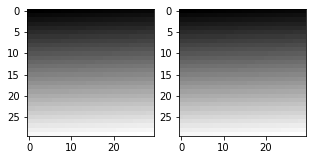

In [15]:
# exemple 2

import numpy as np
from matplotlib import pyplot as plt

image0 = np.linspace(0, 1, 900).reshape((30, 30))
image1 = np.linspace(0, 255, 900).reshape((30, 30)).astype(np.uint8)

print("image0:", image0.dtype, image0.min(), image0.max())
print("image1:", image1.dtype, image1.min(), image1.max())

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(5, 5))
ax0.imshow(image0, cmap='gray')
ax1.imshow(image1, cmap='gray')
plt.show()

 **Question 1:** Expliquer chaque commande dans le code précedent.

On peut changer le type des images en utilisant les deux représentations suivantes: `` img_as_float`` et `` img_as_ubyte``, etc. On prend l'exemple suivant: 

In [16]:
from skimage import img_as_float, img_as_ubyte

from skimage import data

image = data.chelsea()
image1 = img_as_ubyte(image)
image2 = img_as_float(image)

print("type, min, max:", image1.dtype, image1.min(), image1.max())
print("type, min, max:", image2.dtype, image2.min(), image2.max())
print()

print("max_image1/255 =", image1.max()/255.)

type, min, max: uint8 0 231
type, min, max: float64 0.0 0.9058823529411765

max_image1/255 = 0.9058823529411765


**Question 2:** Expliquer chaque commande dans le code précedent.

### I.2. Affichage des images (aléatoire, en niveaux de gris et en couleurs)

On prend dans ce qui suit quelques exemples pour afficher des images de type aléatoire, en niveaux de gris et en couleurs.

#### Exemple 1: Image aléatoire

In [17]:
np.random.random?

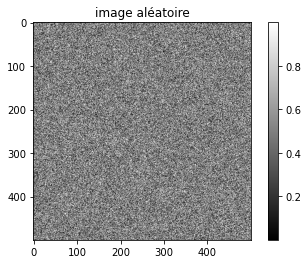

In [18]:
import numpy as np
from matplotlib import pyplot as plt
random_image = np.random.random([500, 500])
plt.imshow(random_image, cmap='gray')
plt.title('image aléatoire')
plt.colorbar();
plt.show()

**Question 3:** Expliquer chaque commande dans le code précedent.

#### Exemple 2: Image en niveaux de gris

Type: <class 'numpy.ndarray'>
dtype: uint8
shape: (303, 384)


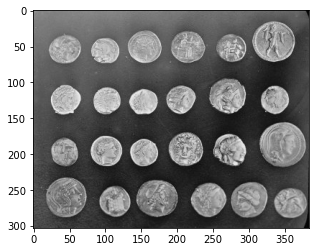

In [19]:
from skimage import data

coins = data.coins()

print('Type:', type(coins))
print('dtype:', coins.dtype)
print('shape:', coins.shape)

plt.imshow(coins, cmap='gray');
plt.show()

**Question 4:** Expliquer chaque commande dans le code précedent.

#### Exemple 3: Image en couleurs RVB

Une image couleur est une matrice 3D, dont la troisième dimension est égale à 3 et représente les cannaux rouge (R), vert (V) et bleu (B):

Shape: (300, 451, 3)
Values min/max: 0 231


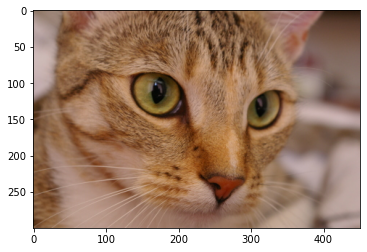

In [20]:
# exemple 1
cat = data.chelsea()
print("Shape:", cat.shape)
print("Values min/max:", cat.min(), cat.max())

plt.imshow(cat);
plt.show()

Shape: (512, 512, 3)
Values min/max: 0 255


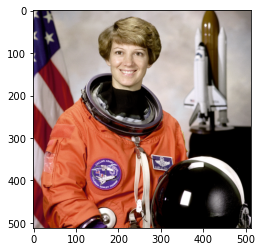

In [21]:
# exemple 2
astronaut = data.astronaut()
print("Shape:", astronaut.shape)
print("Values min/max:", astronaut.min(), astronaut.max())

plt.imshow(astronaut);
plt.show()

### I.3.  Images I/O

Dans les exemples précédents, on a utilisé des exemples d'images à partir de données existants dans ``scikit-image``. Dans d'autres cas, on peut utiliser des images qui sont enregistrées sous forme JPEG ou PNG, etc. 

Par exemple:
```python
from skimage import io

# charger l'image Lena dans une variable X
X = io.imread('images/lena.jpg')

# Voir les caractéristiques de l'image Lena

print(type(X))
print(X.dtype)
print(X.shape)
print(X.min(), X.max())

# Afficher la matrice de l'image X 
plt.imshow(X);

# Sauvegarder l'image X dans une nouvelle image avec un autre nom
plt.imsave('images/image_lena.jpg', X) # save image to disk
```

**Question 5:** Tester l'exemple ci-dessus.

<class 'numpy.ndarray'>
uint8
(220, 220, 3)
0 255


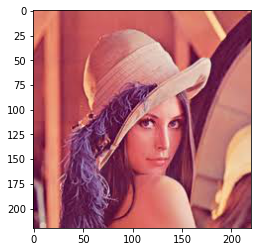

In [22]:
from skimage import io
X = io.imread('images/lena.jpg')
print(type(X))
print(X.dtype)
print(X.shape)
print(X.min(), X.max())
plt.imshow(X);
plt.show()
plt.imsave('images/image_lena.jpg', X) # save image to disk